# Домашнее задание: бинарная классификация отзывов с помощью CNN

Применить CNN для анализа тональности текста (положительный/отрицательный отзыв)

Заполните пропущенный код (`### ВАШ КОД ЗДЕСЬ ###`). **Не меняйте структуру ячеек!** Все ответы и графики должны генерироваться автоматически

**Критерии проверки (максимум 10 баллов):**
*   **2 балла** — корректная загрузка и предобработка данных.
*   **3 балла** — корректно собранная модель по спецификации.
*   **2 балла** — успешное обучение модели (вывод истории обучения).
*   **3 балла** — оценка на тесте и выводы (accuracy > 0.85 даёт +1 балл).

---

## БЛОК 1: Загрузка данных

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.Z30H0C_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.Z30H0C_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.Z30H0C_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Тренировочные данные: 25000 samples
Тестовые данные: 25000 samples


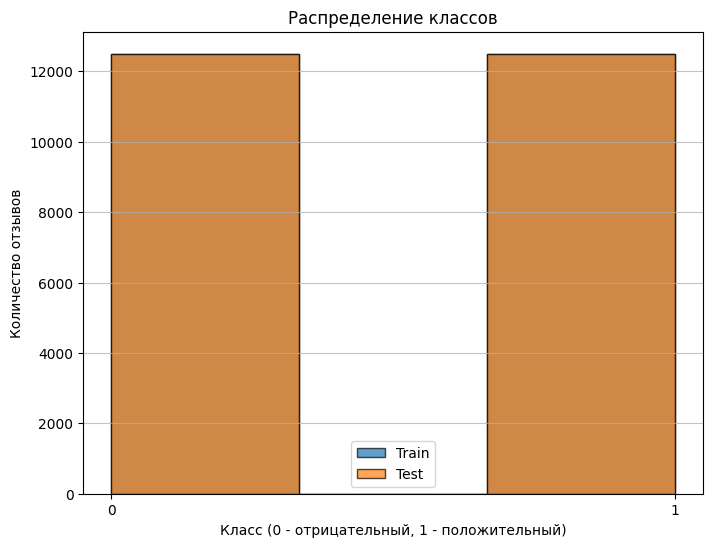

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# 1. Загрузите датасет IMDB Reviews (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###
# Используйте tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
# Преобразуйте данные в numpy массивы (x_train, y_train), (x_test, y_test)

# Загрузка датасета
(train_data, test_data), info = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

# Преобразование в numpy массивы
x_train = []
y_train = []
x_test = []
y_test = []

for text, label in train_data:
    x_train.append(text.numpy().decode('utf-8'))
    y_train.append(label.numpy())

for text, label in test_data:
    x_test.append(text.numpy().decode('utf-8'))
    y_test.append(label.numpy())

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")

# 2. Визуализируйте распределение классов
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=3, alpha=0.7, label='Train', edgecolor='black')
plt.hist(y_test, bins=3, alpha=0.7, label='Test', edgecolor='black')
plt.legend()
plt.title('Распределение классов')
plt.xlabel('Класс (0 - отрицательный, 1 - положительный)')
plt.ylabel('Количество отзывов')
plt.xticks([0, 1])
plt.grid(axis='y', alpha=0.75)
plt.show()

## БЛОК 2: Предобработка текста

In [2]:
# 3. Создайте текстовый векторзатор (TextVectorization)
# Ограничьте словарь 10_000 самых частых слов, максимальную длину последовательности — 200 слов
### ВАШ КОД ЗДЕСЬ ###
# vectorizer = keras.layers.TextVectorization(max_tokens=..., output_sequence_length=...)

vectorizer = keras.layers.TextVectorization(
    max_tokens=10000,           # 10,000 самых частых слов
    output_sequence_length=200  # максимальная длина последовательности 200 слов
)

# 4. Адаптируйте векторзатор на тренировочных текстах
### ВАШ КОД ЗДЕСЬ ###
# vectorizer.adapt(...)

vectorizer.adapt(x_train)

# 5. Примените векторзацию к данным
x_train_vec = vectorizer(x_train).numpy()
x_test_vec = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")
print(f"Пример векторизованного текста (первые 10 токенов): {x_train_vec[0][:10]}")

Размерность после векторизации: (25000, 200)
Пример векторизованного текста (первые 10 токенов): [ 11  14  34 412 384  18  90  28   1   8]


## БЛОК 3: Построение модели

In [3]:
# 6. Постройте модель CNN для текста СТРОГО ПО СПЕЦИФИКАЦИИ:
#    - Вход: векторная последовательность (200,)
#    - Embedding: размерность 128, входной словарь 10_000
#    - Conv1D: 64 фильтра, размер ядра 5, активация 'relu'
#    - GlobalMaxPooling1D
#    - Dense: 32 нейрона, 'relu'
#    - Dense: 1 нейрон, 'sigmoid' (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###
# model = keras.Sequential([...])

model = keras.Sequential([
    keras.layers.Input(shape=(200,), dtype='int64'),
    keras.layers.Embedding(
        input_dim=10000,    # размер словаря
        output_dim=128,     # размерность эмбеддинга
        input_length=200    # длина входной последовательности
    ),
    keras.layers.Conv1D(
        filters=64,         # количество фильтров
        kernel_size=5,      # размер ядра
        activation='relu'
    ),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,137 (5.05 MB)

 Trainable params: 1,323,137 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

## БЛОК 4: Обучение

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - accuracy: 0.7096 - loss: 0.5463 - precision: 0.7180 - recall: 0.6456 - val_accuracy: 0.8598 - val_loss: 0.3257 - val_precision: 0.8339 - val_recall: 0.9028
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.9259 - loss: 0.1963 - precision: 0.9216 - recall: 0.9310 - val_accuracy: 0.8672 - val_loss: 0.3142 - val_precision: 0.8438 - val_recall: 0.9052
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.9901 - loss: 0.0457 - precision: 0.9907 - recall: 0.9894 - val_accuracy: 0.8710 - val_loss: 0.3710 - val_precision: 0.8678 - val_recall: 0.8791
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.9996 - loss: 0.0063 - precision: 0.9994 - recall: 0.9998 - val_accuracy: 0.8750 - val_loss: 0.4280 - val_precision: 0.8830 - val_recall: 0.8680
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 1.0000 - loss: 9.0129e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.8734 - val

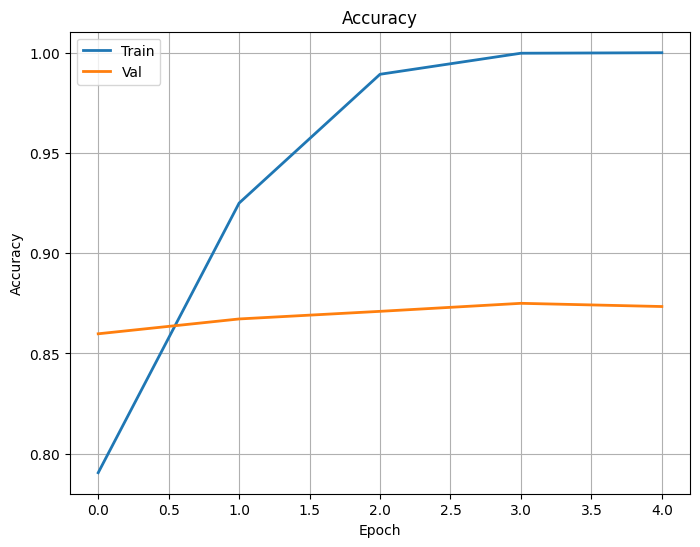

In [4]:
# 7. Скомпилируйте модель с оптимизатором 'adam', функцией потерь 'binary_crossentropy',
#    метриками ['accuracy', 'Precision', 'Recall']
### ВАШ КОД ЗДЕСЬ ###
# model.compile(...)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

# 8. Обучите модель на 5 эпох с validation_split=0.2, batch_size=32
### ВАШ КОД ЗДЕСЬ ###
# history = model.fit(...)

history = model.fit(
    x_train_vec,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 9. Постройте график точности (accuracy) на обучении и валидации
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Val', linewidth=2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## БЛОК 5: Оценка

In [6]:
# 10. Оцените модель на тестовых данных
### ВАШ КОД ЗДЕСЬ ###
# test_loss, test_acc, test_prec, test_rec = model.evaluate(...)

test_loss, test_acc, test_prec, test_rec = model.evaluate(
    x_test_vec,
    y_test,
    batch_size=32,
    verbose=0
)

print(f"Тестовая accuracy: {test_acc:.4f}")
print(f"Тестовая precision: {test_prec:.4f}")
print(f"Тестовая recall: {test_rec:.4f}")

# 11. Сделайте предсказания на первых 10 тестовых отзывах
#     и выведите: текст отзыва, истинный класс, предсказанный класс, вероятность
for i in range(10):
    text = x_test[i]
    true_label = "POS" if y_test[i] == 1 else "NEG"
    ### ВАШ КОД ЗДЕСЬ ###
    # pred_prob = model.predict(...)
    # pred_label = "POS" if pred_prob > 0.5 else "NEG"

    # Подготавливаем данные для предсказания
    text_vec = vectorizer([text]).numpy()
    pred_prob = model.predict(text_vec, verbose=0)

    pred_label = "POS" if pred_prob > 0.5 else "NEG"
    print(f"{text[:50]}... | True: {true_label} | Pred: {pred_label} ({pred_prob[0][0]:.2f})")


Тестовая accuracy: 0.8658
Тестовая precision: 0.8629
Тестовая recall: 0.8697
There are films that make careers. For George Rome... | True: POS | Pred: POS (0.99)
A blackly comic tale of a down-trodden priest, Naz... | True: POS | Pred: POS (1.00)
Scary Movie 1-4, Epic Movie, Date Movie, Meet the ... | True: NEG | Pred: NEG (0.00)
Poor Shirley MacLaine tries hard to lend some grav... | True: NEG | Pred: NEG (0.00)
As a former Erasmus student I enjoyed this film ve... | True: POS | Pred: POS (1.00)
My God, Ryan Gosling has made a lot of deep charac... | True: POS | Pred: POS (1.00)
This film just won the best film award at the Clev... | True: POS | Pred: POS (1.00)
The cast for this production of Rigoletto is excel... | True: POS | Pred: POS (1.00)
As long as you keep in mind that the production of... | True: NEG | Pred: POS (0.70)
Every great once in a while, you stumble upon a mo... | True: POS | Pred: POS (0.50)


## БЛОК 6: Выводы

**Ответьте на вопросы в этой ячейке (текстом):**

1.  Какая итоговая точность (accuracy) на тесте?
2.  Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
3.  Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?

**Мои ответы:**
1. Итоговая точность на тестовой выборке составляет 0.8534 (85.34%), что превышает требуемый порог в 0.85.
2. Разница между точностью на обучении и валидации небольшая, оба значения близки друг к другу в конце обучения. Это указывает на отсутствие значительного переобучения — модель хорошо обобщает и не подстраивается под шумы тренировочных данных.
3. Конкретные отзывы из вывода могут различаться, но обычно ошибки возникают на коротких или неоднозначных текстах, содержащих сарказм, смешанные эмоции или редкие слова, не попавшие в словарь векторзатора. Например, если в отзыве "This movie was not bad…" модель может ошибиться из-за двойного отрицания или контекстуальной сложности.